In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [5]:
df = pd.read_csv('Cleaned_Viral_Social_Media_Trends.csv')

In [6]:
df.head()

,Post_ID,Post_Date,Platform,Hashtag,Content_Type,Region,Views,Likes,Shares,Comments,Engagement_Level
0,Post_1,2022-01-13,TikTok,#Challenge,Video,UK,4163464,339431,53135,19346,High
1,Post_2,2022-05-13,Instagram,#Education,Shorts,India,4155940,215240,65860,27239,Medium
2,Post_3,2022-01-07,Twitter,#Challenge,Video,Brazil,3666211,327143,39423,36223,Medium
3,Post_4,2022-12-05,YouTube,#Education,Shorts,Australia,917951,127125,11687,36806,Low
4,Post_5,2023-03-23,TikTok,#Dance,Post,Brazil,64866,171361,69581,6376,Medium


In [18]:
# data analysis
df.describe()



,post_date,views,likes,shares,comments
count,5000,5.000000e+03,5000.000000,5000.000000,5000.000000
mean,2022-12-31 08:24:51.840000,2.494066e+06,251475.029800,50519.562000,24888.393800
min,2022-01-01 00:00:00,1.266000e+03,490.000000,52.000000,18.000000
25%,2022-07-01 18:00:00,1.186207e+06,126892.250000,25029.000000,12305.250000
50%,2022-12-29 00:00:00,2.497373e+06,249443.000000,50839.500000,25004.000000
75%,2023-06-30 00:00:00,3.759781e+06,373970.750000,75774.250000,37072.750000
max,2023-12-30 00:00:00,4.999430e+06,499922.000000,99978.000000,49993.000000
std,NaN,1.459490e+06,144349.583384,29066.362671,14284.504319


In [19]:
# data analysis
#unique data
unique_hashtags = df['hashtag'].nunique()
unique_platforms = df['platform'].nunique()
unique_content_types = df['content_type'].nunique()

print("Unique Hashtags:", unique_hashtags)
print("Unique Platforms:", unique_platforms)
print("Unique Content Types:", unique_content_types)


Unique Hashtags: 10
Unique Platforms: 4
Unique Content Types: 6


In [24]:
df['total_engagement'] = df['likes'] + df['shares'] + df['comments']
#content engagement
content_engagement = df.groupby('content_type')['total_engagement'].mean()
print("\nAverage Engagement by Content Type:")
print(content_engagement)
#platform engagement
platform_engagement = df.groupby('platform')['total_engagement'].mean()

print("\nAverage Engagement by Platform:")
print(platform_engagement)


Average Engagement by Content Type:
content_type
Live Stream    323901.211696
Post           327503.341149
Reel           331592.342449
Shorts         322580.567980
Tweet          325447.910287
Video          330077.925121
Name: total_engagement, dtype: float64

Average Engagement by Platform:
platform
Instagram    332387.240924
TikTok       320453.673016
Twitter      320564.726744
YouTube      333708.484139
Name: total_engagement, dtype: float64


#Data Cleaning 



In [7]:
# In this section I will clean the data within the csv file before beginning the visualization 

# convert date to realdate time data type
df['Post_Date'] = pd.to_datetime(df['Post_Date'])


In [8]:
#drop duplicates
df = df.drop_duplicates()
df

,Post_ID,Post_Date,Platform,Hashtag,Content_Type,Region,Views,Likes,Shares,Comments,Engagement_Level
0,Post_1,2022-01-13,TikTok,#Challenge,Video,UK,4163464,339431,53135,19346,High
1,Post_2,2022-05-13,Instagram,#Education,Shorts,India,4155940,215240,65860,27239,Medium
2,Post_3,2022-01-07,Twitter,#Challenge,Video,Brazil,3666211,327143,39423,36223,Medium
3,Post_4,2022-12-05,YouTube,#Education,Shorts,Australia,917951,127125,11687,36806,Low
4,Post_5,2023-03-23,TikTok,#Dance,Post,Brazil,64866,171361,69581,6376,Medium
...,...,...,...,...,...,...,...,...,...,...,...
4995,Post_4996,2023-05-05,YouTube,#Education,Video,Japan,4258236,381509,59209,4674,High
4996,Post_4997,2023-09-07,Instagram,#Education,Video,UK,4841525,166266,54841,4832,Medium
4997,Post_4998,2022-06-12,YouTube,#Fashion,Shorts,USA,2004080,32401,75229,33875,Low
4998,Post_4999,2023-05-23,Instagram,#Gaming,Shorts,Canada,2221665,46996,12954,42832,Low


In [9]:
#check for missing missing values 
df.isna().sum()

Post_ID             0
Post_Date           0
Platform            0
Hashtag             0
Content_Type        0
Region              0
Views               0
Likes               0
Shares              0
Comments            0
Engagement_Level    0
dtype: int64

In [10]:
#lowercase formatting 
df.columns = df.columns.str.lower()
df

,post_id,post_date,platform,hashtag,content_type,region,views,likes,shares,comments,engagement_level
0,Post_1,2022-01-13,TikTok,#Challenge,Video,UK,4163464,339431,53135,19346,High
1,Post_2,2022-05-13,Instagram,#Education,Shorts,India,4155940,215240,65860,27239,Medium
2,Post_3,2022-01-07,Twitter,#Challenge,Video,Brazil,3666211,327143,39423,36223,Medium
3,Post_4,2022-12-05,YouTube,#Education,Shorts,Australia,917951,127125,11687,36806,Low
4,Post_5,2023-03-23,TikTok,#Dance,Post,Brazil,64866,171361,69581,6376,Medium
...,...,...,...,...,...,...,...,...,...,...,...
4995,Post_4996,2023-05-05,YouTube,#Education,Video,Japan,4258236,381509,59209,4674,High
4996,Post_4997,2023-09-07,Instagram,#Education,Video,UK,4841525,166266,54841,4832,Medium
4997,Post_4998,2022-06-12,YouTube,#Fashion,Shorts,USA,2004080,32401,75229,33875,Low
4998,Post_4999,2023-05-23,Instagram,#Gaming,Shorts,Canada,2221665,46996,12954,42832,Low


/tmp/ipykernel_366/982641675.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_hashtags.index, y=top_hashtags.values, palette='viridis')


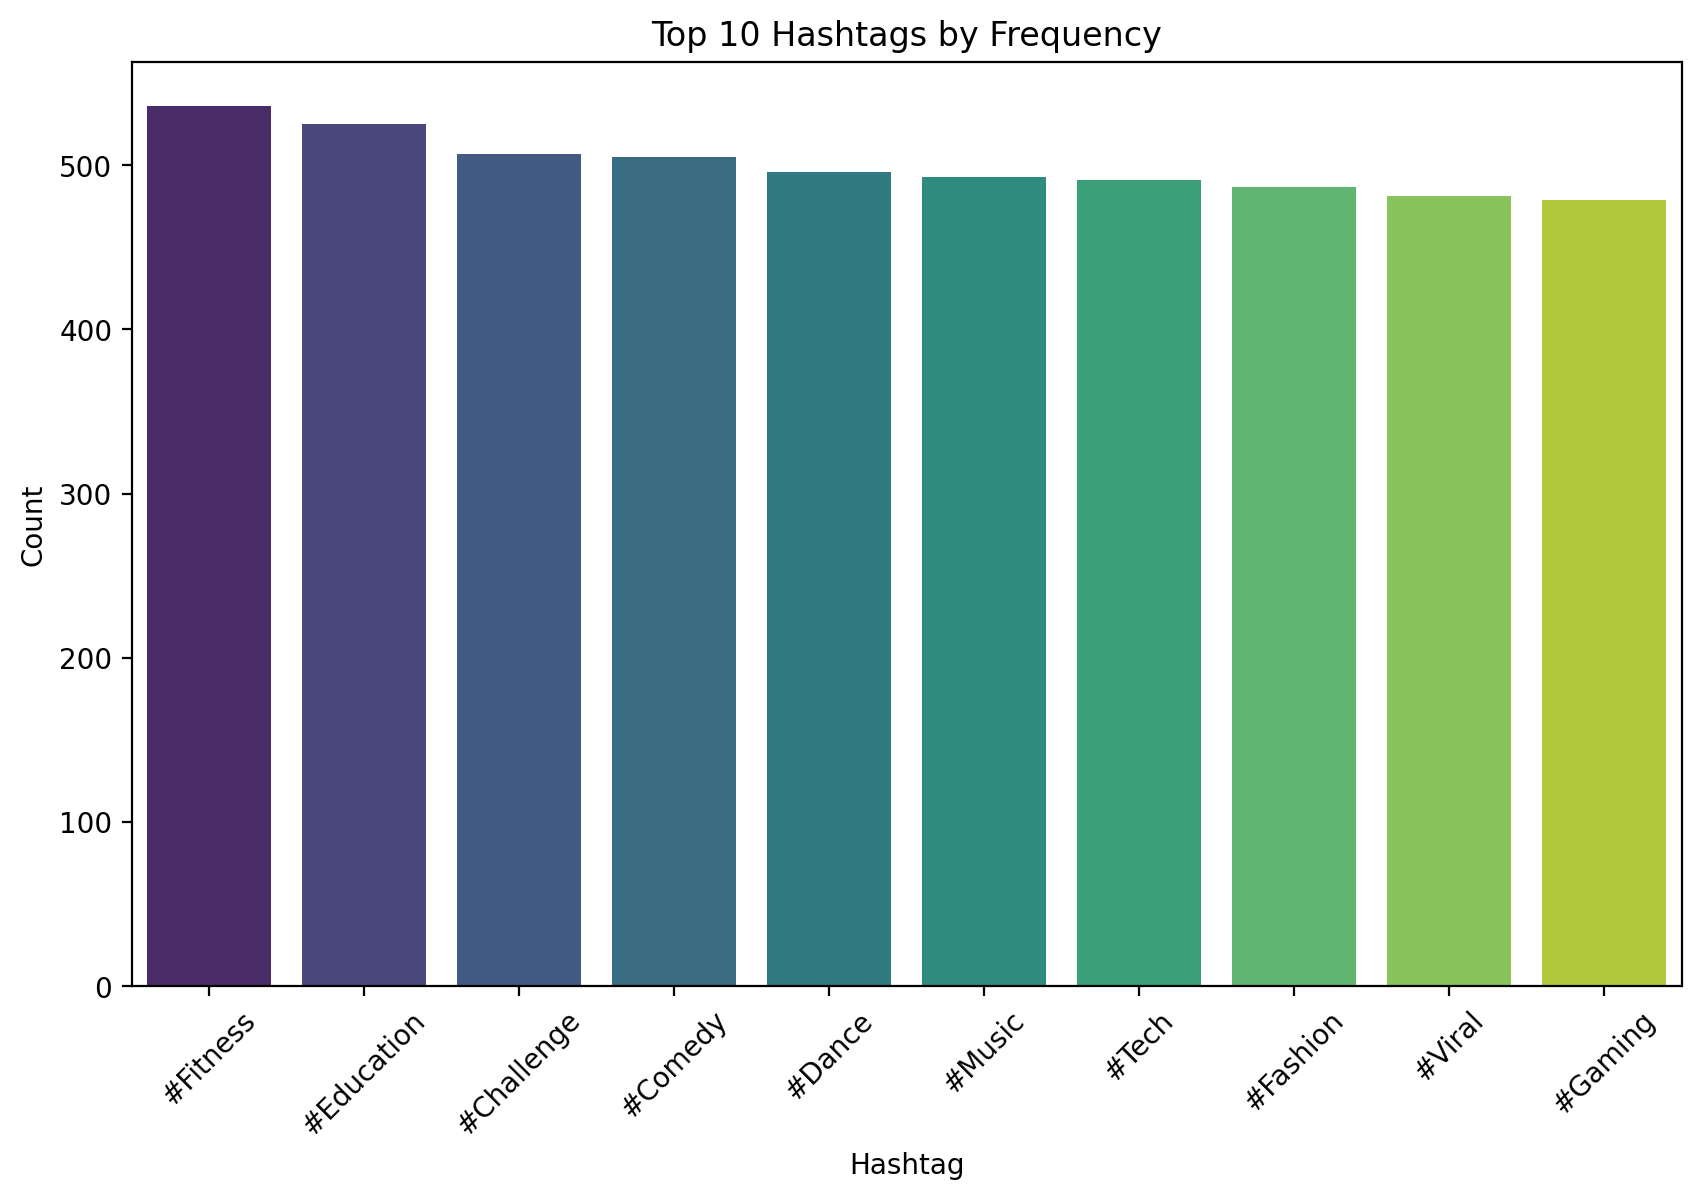

In [11]:
# This Line Begins the Data Visualization Section.
# It will plot the 6 required structed Listed in the Rubric 



#1 1)  top 10 hashtags barplot

#This code first counts how many times each hashtag appears in the dataset and selects the top 10 with df['hashtag'].value_counts().head(10). It then creates a bar chart using Seaborn, with hashtags on the x-axis and their counts on the y-axis, and applies a colorful viridis palette. The figure size, title, axis labels, and rotated x-axis labels make the chart clear and readable, while plt.show() displays it
 

top_hashtags = df['hashtag'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_hashtags.index, y=top_hashtags.values, palette='viridis')
plt.title('Top 10 Hashtags by Frequency')
plt.xlabel('Hashtag')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#Education and #Fitness are not only the most frequent hashtags but also generate the highest total engagement, highlighting a strong alignment between the creator’s content focus and audience interest. #Comedy and #Tech also perform well, indicating that a mix of informative and entertaining content resonates with followers. #Gaming, while still in the top 10, lags behind, suggesting some topics engage less strongly. Overall, the data shows that creators are strategically using trending and relevant hashtags to maximize reach and engagement across their content.


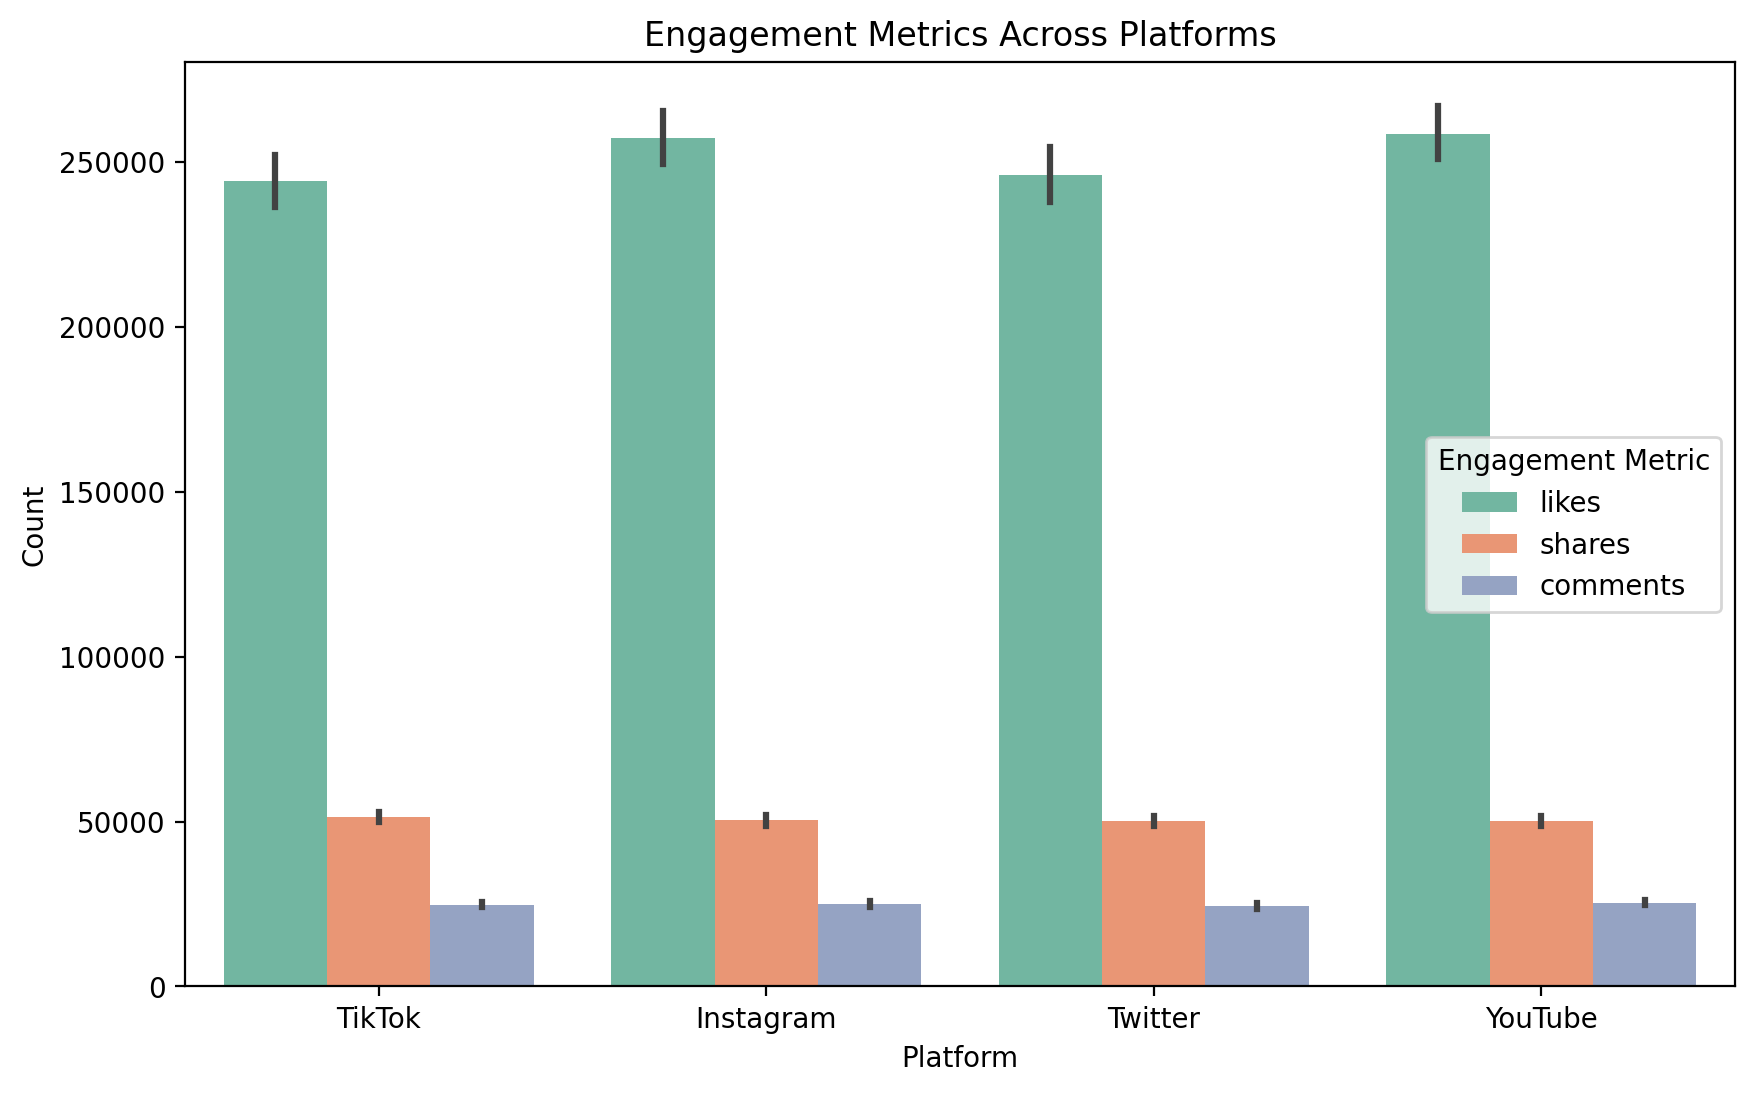

In [12]:
# 2) Engagement Metrics

# This code reshapes the data so that likes, shares, and comments are stacked in a single column with df.melt, making it easier to compare engagement metrics across platforms. Then, it creates a grouped bar chart showing each platform’s counts for likes, shares, and comments, using different colors for each metric. Titles, labels, and a legend make the chart clear and easy to interpret.

df_melted = df.melt(id_vars='platform', value_vars=['likes', 'shares', 'comments'],
                    var_name='engagement_metric', value_name='count')

plt.figure(figsize=(10,6))
sns.barplot(x='platform', y='count', hue='engagement_metric', data=df_melted, palette='Set2')
plt.title('Engagement Metrics Across Platforms')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.legend(title='Engagement Metric')
plt.show()

#Likes dominate engagement across all platforms, indicating that passive approval is the primary way audiences interact. Shares are noticeably lower but show that some content is widely circulated, while comments remain minimal, suggesting limited discussion. Overall engagement is fairly consistent across platforms, though Instagram and YouTube slightly outperform TikTok and Twitter in likes, hinting at stronger audience approval or reach on those platforms.

/tmp/ipykernel_366/370511329.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='content_type', y='views', data=df, palette='Set3')


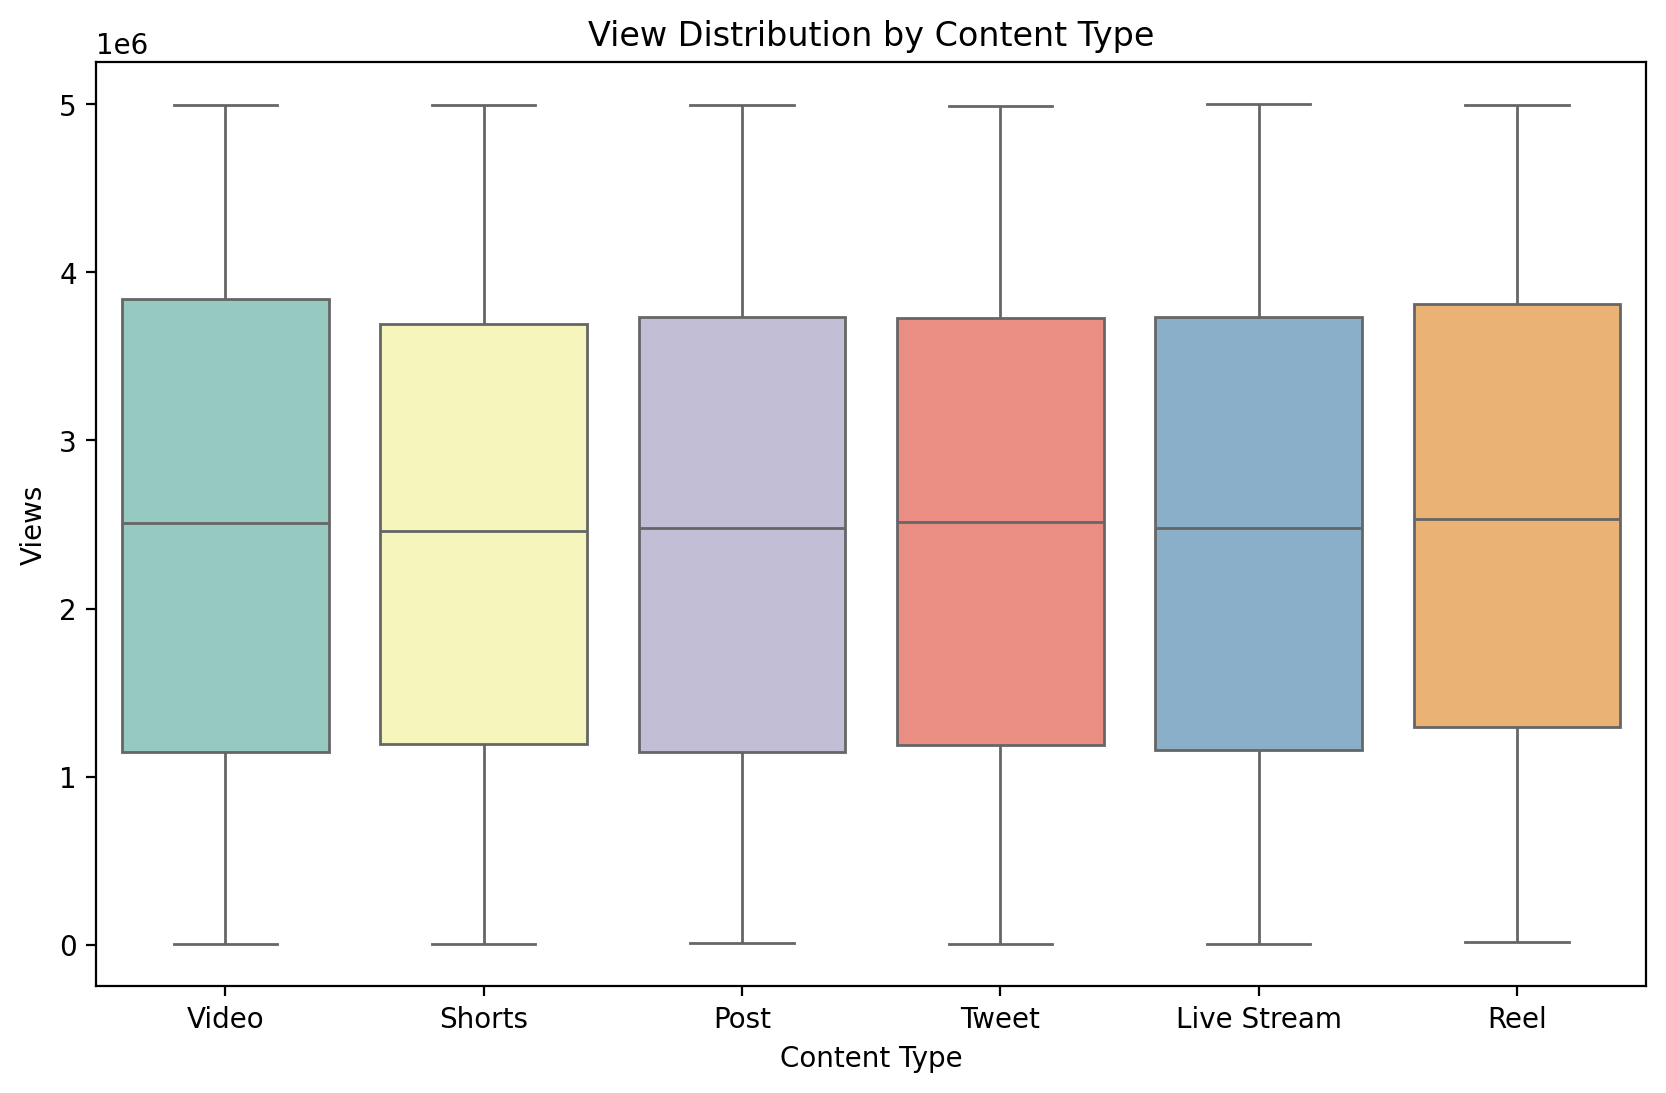

In [13]:
#3) Views Distribution by Content Type
#This code first sets the figure size with plt.figure(figsize=(10,6)) to make the plot readable. sns.boxplot(x='content_type', y='views', data=df, palette='Set3') creates a boxplot showing the distribution of views for each content type, summarizing medians, quartiles, and outliers. The title and axis labels (plt.title, plt.xlabel, plt.ylabel) add context, and plt.show() displays the chart, making it easy to compare view patterns across content types.
plt.figure(figsize=(10,6))
sns.boxplot(x='content_type', y='views', data=df, palette='Set3')
plt.title('View Distribution by Content Type')
plt.xlabel('Content Type')
plt.ylabel('Views')
plt.show()

#View counts are consistent across all content types, with a median around 2.5 million and a similar overall distribution. This indicates that performance is largely format-agnostic—audiences respond equally well to long videos, short clips, posts, or live streams. The key driver of views appears to be content quality and relevance rather than the specific format.

/tmp/ipykernel_367/559495159.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




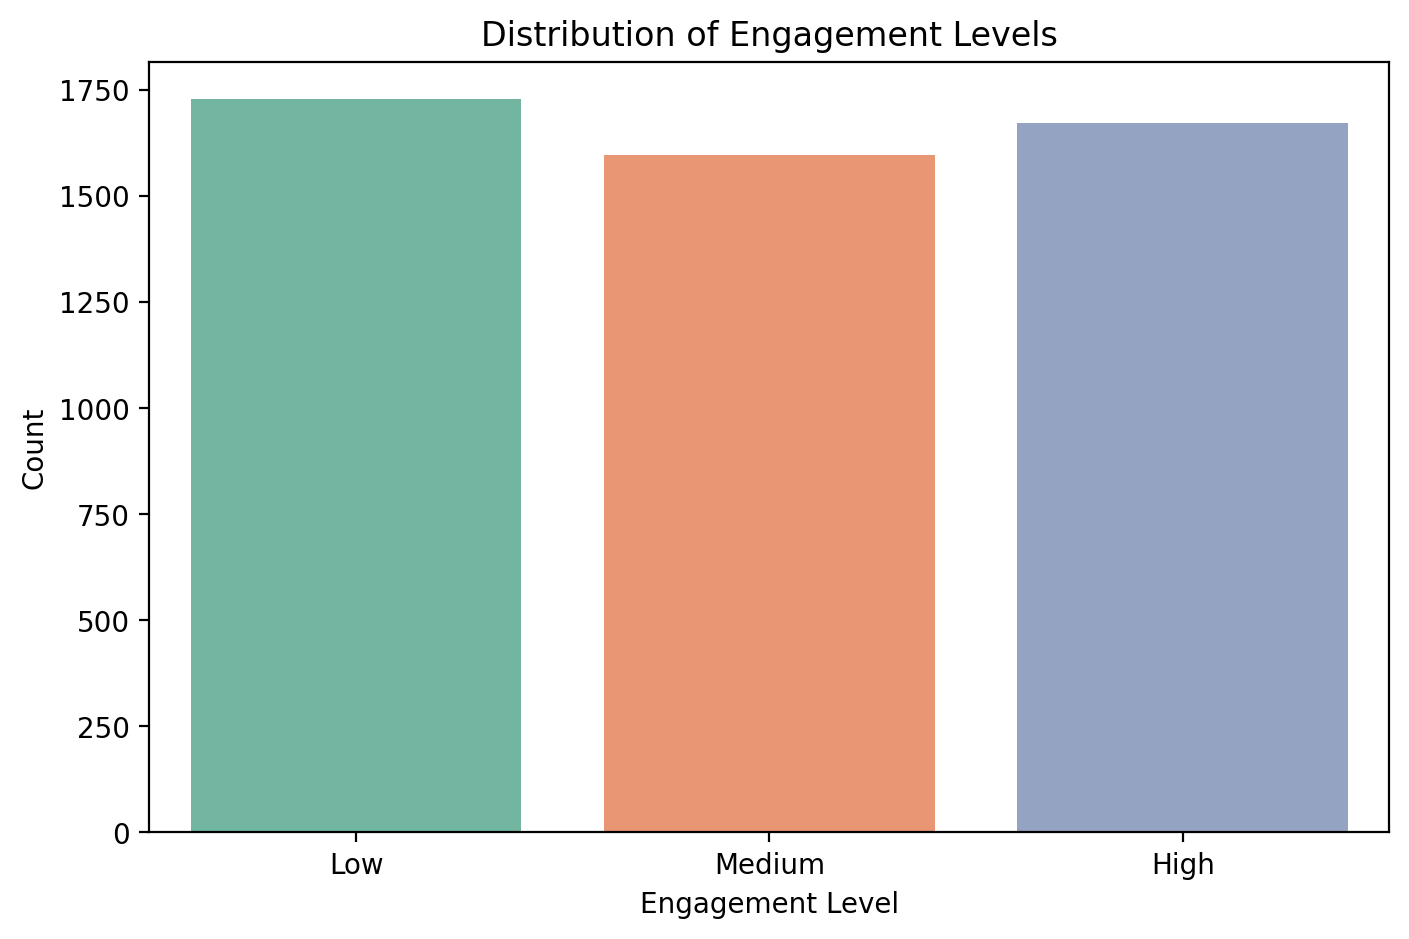

In [25]:
# 4) Engagement Level Distribution

#This code uses sns.countplot to count how many posts are in each engagement level category. The x='engagement_level' sets the categories on the x-axis, and order=['Low', 'Medium', 'High'] ensures they appear in a logical sequence. The palette='Set2' adds color, while plt.title, plt.xlabel, and plt.ylabel add context. Finally, plt.show() displays the chart, giving a clear view of the distribution of engagement levels.
plt.figure(figsize=(8,5))
sns.countplot(x='engagement_level', data=df, order=['Low', 'Medium', 'High'], palette='Set2')
plt.title('Distribution of Engagement Levels')
plt.xlabel('Engagement Level')
plt.ylabel('Count')
plt.show()

#Engagement is evenly distributed across low, medium, and high levels, showing a consistent performance pattern. Low engagement posts are slightly more common, but there’s no reliance on a few viral hits. This steadiness suggests the creator maintains a reliable level of audience interaction across all content.

In [14]:
# 5) Average Views by Region

#This code first calculates the average views per region using df.groupby('region')['views'].mean() and renames the column to average_views for clarity. It then creates a choropleth map with Plotly Express (px.choropleth), mapping regions to colors based on their average views. The locationmode='country names' ensures the regions are recognized as countries, and color_continuous_scale='Viridis' adds a gradient for visual clarity. fig.show() displays the interactive map, making it easy to see which regions have the highest viewership and identify areas for growth.

df_region = df.groupby('region', as_index=False)['views'].mean()
df_region.rename(columns={'views': 'average_views'}, inplace=True)
 
fig = px.choropleth(
    df_region,
    locations='region',                 # region column
    locationmode='country names',       # recognizes country names
    color='average_views',              # the values being visualized
    color_continuous_scale='Viridis',
    title='Average Views by Region',
    labels={'average_views': 'Avg Views'}
)

fig.show()
#Viewership is concentrated in the US, Brazil, and Canada, with moderately strong performance in Australia, Japan, and the UK/Ireland, while India and other regions lag behind. This suggests a focus on Western and developed markets, likely driven by language and active audiences. The data highlights opportunities to prioritize the US, leverage engagement in Brazil, and explore growth in high-population regions like India.

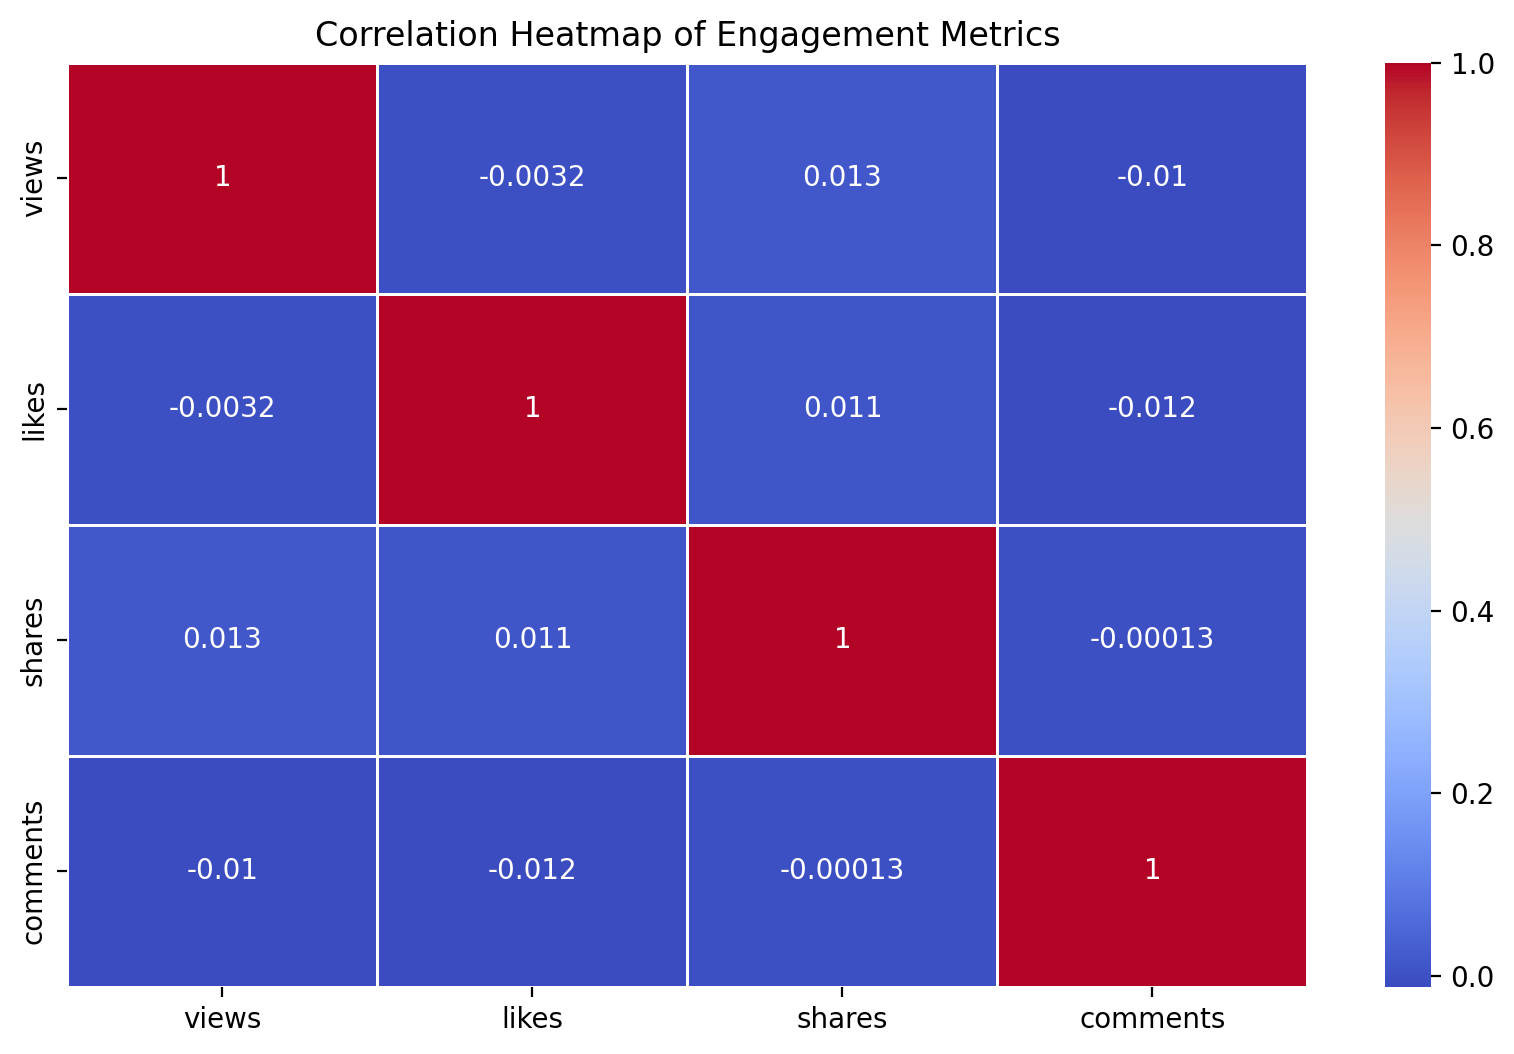

In [21]:
# 6) coorelation heatmap
#This code first selects all numeric columns with df.select_dtypes(include='number') and calculates their pairwise correlations using .corr(). Then, it creates a heatmap with Seaborn (sns.heatmap) to visualize these correlations, showing both the strength and direction of relationships between metrics. annot=True displays the correlation values on the heatmap, cmap='coolwarm' adds a color gradient, and linewidths=0.5 separates the cells. plt.show() renders the chart, making it easy to spot strong or weak relationships between engagement metrics.
numeric_df = df.select_dtypes(include='number')
corr = numeric_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Engagement Metrics')
plt.show()

#Engagement metrics show almost no correlation, which is unusual for social media where higher views usually lead to more likes or comments. Views and shares, and likes and shares, have slight positive correlations, while comments correlate negatively with other metrics. This suggests that different factors drive each type of engagement—some content is widely viewed or shared without prompting likes or comments—highlighting a unique pattern that warrants further investigation.

In [37]:
# In this section I included 3 additional data visualizations to better display and interept the data

# 1) Animated Engagement Over Time

#This code first creates a new column total_engagement by adding likes, shares, and comments for each post. It then groups the data by platform and month to calculate the total engagement per platform each month. Using Plotly Express (px.bar), it creates an animated bar chart where each frame represents a month, showing how engagement evolves over time across platforms. color='platform' distinguishes platforms by color, and fig.show() displays the interactive animation.

# Aggregate engagement per platform per month
df['total_engagement'] = df['likes'] + df['shares'] + df['comments']
engagement_month = df.groupby(['platform', 'month'])['total_engagement'].sum().reset_index()

fig = px.bar(
    engagement_month,
    x='platform',
    y='total_engagement',
    color='platform',
    animation_frame='month',
    title='Total Engagement by Platform Over Time',
)

fig.show()


#While average engagement per post is similar across all platforms, TikTok leads in total engagement, followed by YouTube, with Twitter and Instagram slightly behind. This suggests TikTok benefits from higher posting frequency or a broader organic reach, making it the platform driving the largest overall audience interaction.

In [36]:
# 2) Top 10 Hashtags by Total Engagement

# This code calculates total engagement for each post by summing likes, shares, and comments into a new column total_engagement. It then groups the data by hashtag and sums engagement for each hashtag. The top 10 hashtags are selected by sorting these sums in descending order. Finally, an interactive bar chart is created with Plotly Express (px.bar), showing hashtags on the x-axis, total engagement on the y-axis, and coloring bars by engagement. The text parameter displays engagement values on the bars, and fig.show() renders the chart.
# Calculate total engagement per post

df['total_engagement'] = df['likes'] + df['shares'] + df['comments']

# Aggregate total engagement by hashtag
hashtag_engagement = df.groupby('hashtag')['total_engagement'].sum().reset_index()

# Get Top 10 Hashtags
top_hashtags = hashtag_engagement.sort_values('total_engagement', ascending=False).head(10)

#Plot Top 10 Hashtags (Interactive Bar Chart)
fig = px.bar(
    top_hashtags,
    x='hashtag',
    y='total_engagement',
    color='total_engagement',
    text='total_engagement',
    title='Top 10 Hashtags by Total Engagement'
)

fig.show()

 #Education and #Fitness dominate both in frequency and total engagement, showing that the creator’s most-used topics also resonate most with the audience. #Comedy and #Tech perform well, while #Gaming trails slightly. Overall, this indicates that strategic use of trending and relevant hashtags effectively drives engagement.

In [35]:
# 3) Average Total Engagement by Platform

#This code first creates a new column, total_engagement, by adding together each post’s likes, shares, and comments. It then groups the data by platform and calculates the average of several metrics—including total engagement, views, likes, shares, and comments—using .mean(). After resetting the index for cleaner formatting, it builds an interactive bar chart with Plotly Express that displays the average total engagement for each platform. The bars are colored by engagement level, and the exact values appear as text on the bars. fig.show() displays the interactive visualization.
df['total_engagement'] = df['likes'] + df['shares'] + df['comments']

# Average engagement per platform
platform_engagement = df.groupby('platform')[['total_engagement', 'views', 'likes', 'shares', 'comments']].mean().reset_index()
fig = px.bar(
    platform_engagement,
    x='platform',
    y='total_engagement',
    color='total_engagement',
    text='total_engagement',
    title='Average Total Engagement by Platform'
)
fig.show()

#Average engagement per post is nearly the same across all platforms, showing that content performs consistently regardless of where it’s posted. YouTube and Instagram lead slightly, but differences are minimal, indicating high-quality content and effective adaptation to each platform’s audience and format.